In [16]:
import sqlite3
import numpy as np
import pandas as pd

### Read in SQL files

In [6]:
querystr ="""
select
   *
from 
    todolist
"""
sql = sqlite3.connect('Data/todo.sqlite')
tdl = pd.read_sql_query(querystr, sql)

In [7]:
tdl.head(5)

,priority,starid,sector,datasource,camera,ccd,method,tmag,status,cbv_area,corr_status
0,1,44577667,1,ffi,2,3,None,-0.159,2,232,None
1,2,38877693,1,ffi,4,1,None,0.868,2,413,None
2,3,238196512,1,ffi,3,3,None,1.613,1,333,None
3,4,394046358,1,ffi,2,1,None,1.721,1,212,None
4,5,382422098,1,ffi,2,3,None,1.941,1,233,None


In [9]:
querystr ="""
select
   *
from 
    diagnostics
"""
sql = sqlite3.connect('Data/todo.sqlite')
dia = pd.read_sql_query(querystr, sql)

In [11]:
dia.head(5)

,priority,starid,lightcurve,elaptime,mean_flux,variance,variability,rms_hour,ptp,pos_row,pos_column,contamination,mask_size,stamp_width,stamp_height,stamp_resizes,errors
0,7,382420379,tpf/00382/tess00382420379-s01-c0120-dr01-v04-t...,26.568024,27783294.0,0.001544,896.815906,0.041551,0.000149,572.794162,1677.038118,0.009110,278.0,11,145,0,None
1,8,382420379,ffi/00382/tess00382420379-s01-c1800-dr01-v04-t...,42.181054,28240027.0,0.001390,688.435925,0.039144,0.000127,572.763578,1677.073106,0.072668,2197.0,75,151,1,None
2,3,238196512,ffi/00238/tess00238196512-s01-c1800-dr01-v04-t...,56.326981,39457848.0,0.000043,1350.414490,0.003036,0.000045,235.915788,1927.981185,0.006703,1993.0,81,219,0,None
3,4,394046358,ffi/00394/tess00394046358-s01-c1800-dr01-v04-t...,52.747992,34529712.0,0.000028,1135.452644,0.001293,0.000042,1487.564468,1414.536144,0.009421,1468.0,77,205,0,None
4,6,382422098,tpf/00382/tess00382422098-s01-c0120-dr01-v04-t...,50.121518,25985574.0,0.000430,827.347525,0.011910,0.000151,327.498607,1300.851200,0.004043,264.0,25,179,0,None


### Call 00008 files only

In [44]:
dia['folder'] = dia['lightcurve'].str.slice(4, 9)
dia['folder'].head(2)

0    00382
1    00382
Name: folder, dtype: object

In [48]:
sel = dia['folder'] == '00008'
dia = dia[sel]

### Call in a single ens and cbv lightcurve and plot them

In [55]:
file = dia.lightcurve.values[0]
print(file)
cbv = file[:-11] + '-cbv' + file[-11:]
print(cbv)
ens = file[:-11] + '-ens' + file[-11:]
print(ens)

ffi/00008/tess00008196058-s01-c1800-dr01-v04-tasoc_lc.fits.gz
ffi/00008/tess00008196058-s01-c1800-dr01-v04-tasoc-cbv_lc.fits.gz
ffi/00008/tess00008196058-s01-c1800-dr01-v04-tasoc-ens_lc.fits.gz


In [102]:
from astropy.io import fits


In [107]:
def hdu_to_pandas(hdu):
    cols = hdu.data.columns.names
    df = pd.DataFrame()
    for col in cols:
        df[col] = hdu.data[col]
    return df

In [108]:
cbvdf = hdu_to_pandas(fits.open(f'Data/{cbv}')[1])
ensdf = hdu_to_pandas(fits.open(f'Data/{ens}')[1])

In [110]:
cbvdf.columns

Index(['TIME', 'TIMECORR', 'CADENCENO', 'FLUX_RAW', 'FLUX_RAW_ERR', 'FLUX_BKG',
       'FLUX_CORR', 'FLUX_CORR_ERR', 'QUALITY', 'PIXEL_QUALITY', 'MOM_CENTR1',
       'MOM_CENTR2', 'POS_CORR1', 'POS_CORR2'],
      dtype='object')

In [113]:
def mnras_size(fig_width_pt, square=False):
    inches_per_pt = 1.0/72.00              # Convert pt to inches
    golden_mean = (np.sqrt(5)-1.0)/2.0     # Most aesthetic ratio
    fig_width = fig_width_pt*inches_per_pt # Figure width in inches
    if square:
        fig_height = fig_width
    else:
        fig_height = fig_width*golden_mean
    return [fig_width,fig_height]

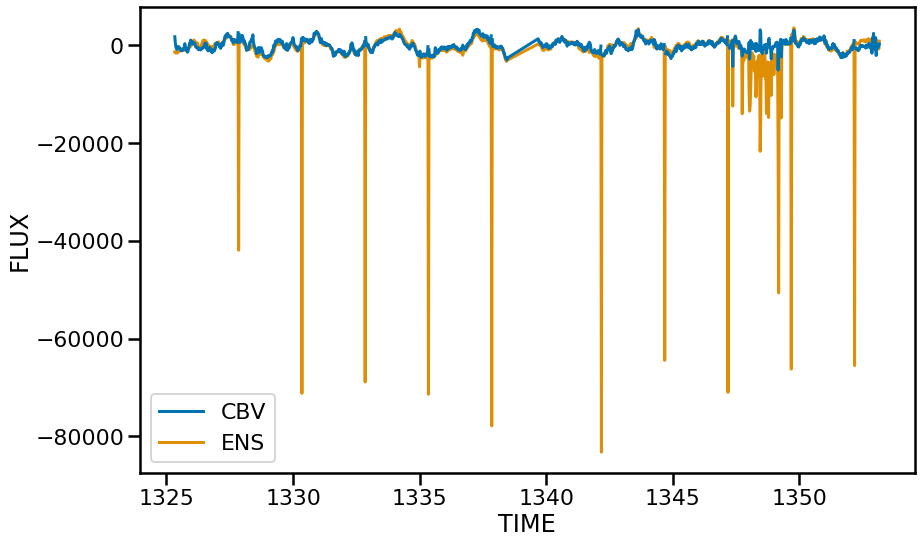

In [127]:
import seaborn as sns
sns.set_palette('colorblind')
sns.set_context('poster')
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(mnras_size(1000)))
plt.plot(cbvdf.TIME, cbvdf.FLUX_CORR, label='CBV', zorder=2)
plt.plot(ensdf.TIME, ensdf.FLUX_CORR, label='ENS', zorder=1)
plt.xlabel('TIME')
plt.ylabel('FLUX')
plt.legend()
plt.show();


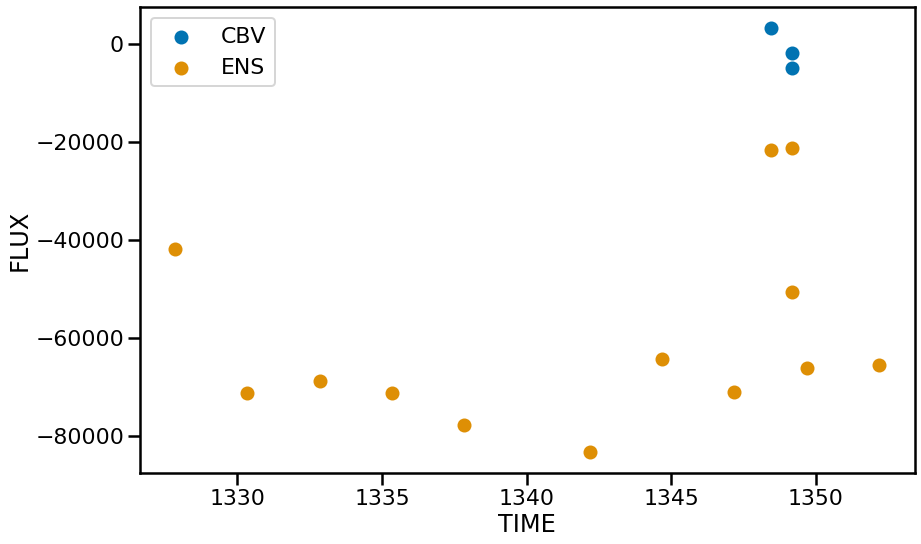

In [131]:
sel = ensdf.FLUX_CORR < -20000
fig = plt.figure(figsize=(mnras_size(1000)))
plt.scatter(cbvdf.TIME[sel], cbvdf.FLUX_CORR[sel], label='CBV', zorder=2)
plt.scatter(ensdf.TIME[sel], ensdf.FLUX_CORR[sel], label='ENS', zorder=1)
plt.xlabel('TIME')
plt.ylabel('FLUX')
plt.legend()
plt.show();

In [132]:
dia

,priority,starid,lightcurve,elaptime,mean_flux,variance,variability,rms_hour,ptp,pos_row,pos_column,contamination,mask_size,stamp_width,stamp_height,stamp_resizes,errors,folder
8530,8623,8196058,ffi/00008/tess00008196058-s01-c1800-dr01-v04-t...,3.087053,83394.382812,0.000048,66.717342,0.001463,0.000208,1807.025842,130.678180,0.037314,93.0,17,17,0,None,00008
8545,8639,8196058,tpf/00008/tess00008196058-s01-c0120-dr01-v04-t...,13.585710,80722.273438,0.000081,22.776389,0.001366,0.000458,1807.005865,130.646310,0.025549,48.0,11,13,0,None,00008
17215,17468,8195342,ffi/00008/tess00008195342-s01-c1800-dr01-v04-t...,3.272227,42088.460938,0.001972,280.186566,0.067177,0.000505,1501.394775,63.552962,0.189584,60.0,15,15,0,None,00008
17565,17826,8196173,tpf/00008/tess00008196173-s01-c0120-dr01-v04-t...,13.321483,40435.539062,0.000066,14.150745,0.000725,0.000660,1843.855562,145.909791,0.062153,37.0,11,11,0,None,00008
17571,17832,8196173,ffi/00008/tess00008196173-s01-c1800-dr01-v04-t...,3.709579,41913.132812,0.000056,49.394059,0.001246,0.000242,1843.900944,145.963825,0.066604,64.0,15,15,0,None,00008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963143,1352883,8196441,ffi/00008/tess00008196441-s01-c1800-dr01-v04-t...,15.813418,173.315643,0.003290,7.421648,0.022100,0.007647,1946.029588,168.739665,0.414937,7.0,15,15,0,None,00008
964861,1356144,8195323,ffi/00008/tess00008195323-s01-c1800-dr01-v04-t...,8.949771,77.790081,0.003168,4.227818,0.049801,0.011790,1494.086296,58.002396,0.000000,5.0,15,15,0,None,00008
965740,1357861,8196144,ffi/00008/tess00008196144-s01-c1800-dr01-v04-t...,4.102324,394.645630,0.001214,7.960468,0.011109,0.005979,1839.296344,125.518478,0.659444,19.0,15,15,0,None,00008
974987,1375692,8195320,ffi/00008/tess00008195320-s01-c1800-dr01-v04-t...,7.073730,76.789131,0.005321,5.010755,0.073188,0.013027,1495.320642,47.274166,0.000000,5.0,10,15,0,None,00008


In [141]:
tdl[tdl['starid'] == 8196058]

,priority,starid,sector,datasource,camera,ccd,method,tmag,status,cbv_area,corr_status
8622,8623,8196058,1,ffi,1,1,None,8.18,1,113,None
8638,8639,8196058,1,tpf,1,1,None,8.18,1,113,None
